Om Gaikwad - AAI595 -HW2

## Question 1. Hands-on Linear Regression
In this question, you need to write a program to find the coefficients of a linear regression model for the
dataset provided (data2.txt). Use NumPy to load the data and plot it [2 pts].

In [250]:
import numpy as np
import matplotlib.pyplot as plt
import math


[[ 6.1101  17.592  ]
 [ 5.5277   9.1302 ]
 [ 8.5186  13.662  ]
 [ 7.0032  11.854  ]
 [ 5.8598   6.8233 ]
 [ 8.3829  11.886  ]
 [ 7.4764   4.3483 ]
 [ 8.5781  12.     ]
 [ 6.4862   6.5987 ]
 [ 5.0546   3.8166 ]
 [ 5.7107   3.2522 ]
 [14.164   15.505  ]
 [ 5.734    3.1551 ]
 [ 8.4084   7.2258 ]
 [ 5.6407   0.71618]
 [ 5.3794   3.5129 ]
 [ 6.3654   5.3048 ]
 [ 5.1301   0.56077]
 [ 6.4296   3.6518 ]
 [ 7.0708   5.3893 ]
 [ 6.1891   3.1386 ]
 [20.27    21.767  ]
 [ 5.4901   4.263  ]
 [ 6.3261   5.1875 ]
 [ 5.5649   3.0825 ]
 [18.945   22.638  ]
 [12.828   13.501  ]
 [10.957    7.0467 ]
 [13.176   14.692  ]
 [22.203   24.147  ]
 [ 5.2524  -1.22   ]
 [ 6.5894   5.9966 ]
 [ 9.2482  12.134  ]
 [ 5.8918   1.8495 ]
 [ 8.2111   6.5426 ]
 [ 7.9334   4.5623 ]
 [ 8.0959   4.1164 ]
 [ 5.6063   3.3928 ]
 [12.836   10.117  ]
 [ 6.3534   5.4974 ]
 [ 5.4069   0.55657]
 [ 6.8825   3.9115 ]
 [11.708    5.3854 ]
 [ 5.7737   2.4406 ]
 [ 7.8247   6.7318 ]
 [ 7.0931   1.0463 ]
 [ 5.0702   5.1337 ]
 [ 5.8014   1

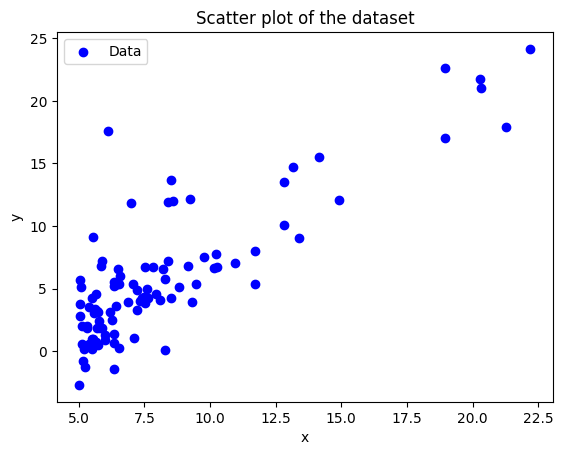

In [251]:
filepath = "/Users/omiee/Documents/GitHub/MachineLearning/AAI-595 - Intro to Machine Learning/HW2/data2-2.txt"
data = np.loadtxt(filepath, delimiter=',')
x = data[:, 0]  # Feature
y = data[:, 1]  # Target

print(data)

# Visualization of the dataset
plt.scatter(x, y, color='b', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of the dataset')
plt.legend()
plt.show()

Assume a linear model: y = w0 + w1*x. 
### Method 1: Normal equation
Split the dataset into 80% for training and 20% for testing.
Hints: You can generate a sequence having the same length as the data number. Shuffle it at random. Select the first 80% as the training set and the other as the testing set.

In [252]:
# Split dataset (80% training, 20% testing)
np.random.seed(42)
indices = np.arange(len(x))
np.random.shuffle(indices)
split_idx = int(0.8 * len(x))
train_idx, test_idx = indices[:split_idx], indices[split_idx:]

x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

In [253]:
# Normal Equation Method
def normal_equation(x, y):
    X = np.vstack((np.ones(len(x)), x)).T
    y = y.reshape(-1, 1)
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta.flatten()

w0, w1 = normal_equation(x_train, y_train)
print(f"Normal Equation Coefficients: w0 = {w0:.4f}, w1 = {w1:.4f}")


Normal Equation Coefficients: w0 = -3.6330, w1 = 1.1578


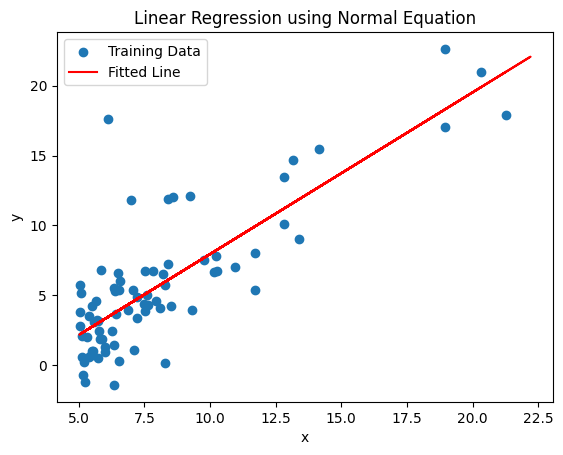

In [254]:
# Plot regression line
plt.scatter(x_train, y_train, label="Training Data")
plt.plot(x, w0 + w1 * x, color="red", label="Fitted Line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression using Normal Equation")
plt.show()

### Method 2: Stochastic gradient Descent
1. Use stochastic Gradient Descent to find the coefficients of the linear model. Plot MSE vs. iteration for both the training set and testing set in one figure:

Hint: Your code should include
1. Weights initialization. [2]
2. A loop updating the parameters based on the gradient (See Slide 22). The termination
conditions of the loop should at least include the maximum iteration number and the cost
function threshold. [10]
3. For each loop, MSE on the training and testing dataset should be calculated and stored for
plotting. [3]

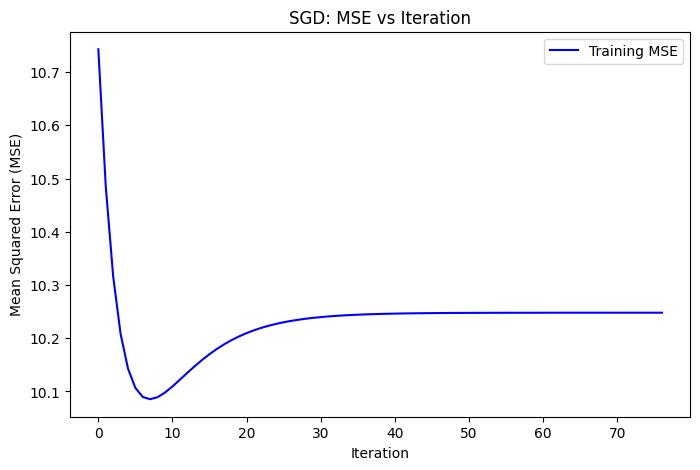

(np.float64(-3.5595451710904062), np.float64(1.2775861775879376))

In [255]:
# Stochastic Gradient Descent Implementation
def stochastic_gradient_descent(x_train, y_train, x_test, y_test, lr=0.01, max_iter=1000, tolerance=1e-6):

    w0, w1 = 0, 0  # Initialize weights
    n = len(y_train)
    train_mse_list = []
    test_mse_list = []
    
    for gradesc in range(max_iter):
        for i in range(n):
            x_i, y_i = x_train[i], y_train[i]
            y_pred = w0 + w1 * x_i
            error = y_pred - y_i
            
            # Update weights
            w0 -= lr * error
            w1 -= lr * error * x_i
        
        # Compute MSE for training and testing data
        y_train_pred = w0 + w1 * x_train
        y_test_pred = w0 + w1 * x_test
        train_mse = np.mean((y_train - y_train_pred) ** 2)
        test_mse = np.mean((y_test - y_test_pred) ** 2)
        
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
        
        # Convergence check (stop if change in loss is below tolerance)
        if gradesc > 0 and abs(train_mse_list[-1] - train_mse_list[-2]) < tolerance:
            break
    
    return w0, w1, train_mse_list, test_mse_list

# Run SGD with learning rate 0.01
w0_sgd, w1_sgd, train_mse_sgd, test_mse_sgd = stochastic_gradient_descent(x_train, y_train, x_test, y_test, lr=0.01, max_iter=1000)

# Plot MSE vs Iteration for Training and Testing Sets
plt.figure(figsize=(8, 5))
plt.plot(range(len(train_mse_sgd)), train_mse_sgd, label='Training MSE', color='blue')
#plt.plot(range(len(test_mse_sgd)), test_mse_sgd, label='Testing MSE', color='red')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('SGD: MSE vs Iteration')
plt.legend()
plt.show()

# Output results
w0_sgd, w1_sgd

## MSE vs Iterration for best SGD

In [256]:
# Stochastic Gradient Descent

def stochastic_gradient_descent(x, y, lr=0.01, max_iter=1000, tol=1e-6):
    np.random.seed(42)
    m = len(y)
    X = np.vstack((np.ones(m), x)).T
    y = y.reshape(-1, 1)
    theta = np.zeros((2, 1))
    mse_list = []
    
    for i in range(max_iter):
        idx = np.random.randint(0, m)  # Select random index
        xi = X[idx].reshape(1, -1)
        yi = y[idx]
        
        gradient = -2 * xi.T @ (yi - xi @ theta)
        theta -= lr * gradient
        
        mse = np.mean((X @ theta - y) ** 2)
        mse_list.append(mse)
        
        if len(mse_list) > 1 and abs(mse_list[-1] - mse_list[-2]) < tol:
            break
    
    return theta.flatten(), mse_list

Best Learning Rate: 0.004, Coefficients: [-2.98169649  1.12466098]


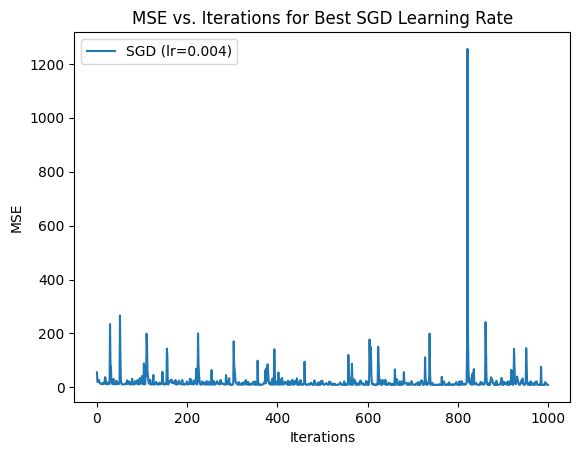

In [257]:
# Run SGD for different learning rates
learning_rates = np.arange(0.001, 0.011, 0.001)
sgd_results = {}

for lr in learning_rates:
    theta_sgd, mse_sgd = stochastic_gradient_descent(x_train, y_train, lr=lr)
    sgd_results[lr] = (theta_sgd, mse_sgd[-1])

# Determine best learning rate
best_lr = min(sgd_results, key=lambda lr: sgd_results[lr][1])
best_theta_sgd, best_mse_sgd = sgd_results[best_lr]
print(f"Best Learning Rate: {best_lr}, Coefficients: {best_theta_sgd}")

# Plot MSE vs. iterations for the best learning rate
_, mse_list = stochastic_gradient_descent(x_train, y_train, lr=best_lr)
plt.plot(mse_list, label=f"SGD (lr={best_lr})")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend()
plt.title("MSE vs. Iterations for Best SGD Learning Rate")
plt.show()

### Method 3: Batch Gradient Descent

Use batch gradient descent to repeat all the steps in SGD. 


In [258]:
# Batch Gradient Descent
def batch_gradient_descent(x, y, lr=0.01, max_iter=1000, tol=1e-6):
    m = len(y)
    X = np.vstack((np.ones(m), x)).T
    y = y.reshape(-1, 1)
    theta = np.zeros((2, 1))
    mse_list = []
    
    for i in range(max_iter):
        gradient = -2/m * X.T @ (y - X @ theta)
        theta -= lr * gradient
        
        mse = np.mean((X @ theta - y) ** 2)
        mse_list.append(mse)
        
        if len(mse_list) > 1 and abs(mse_list[-1] - mse_list[-2]) < tol:
            break
    
    return theta.flatten(), mse_list

# Run BGD with best LR from SGD
theta_bgd, mse_bgd = batch_gradient_descent(x_train, y_train, lr=best_lr)
print(f"Batch Gradient Descent Coefficients: {theta_bgd}")

Batch Gradient Descent Coefficients: [-2.61553495  1.05195691]


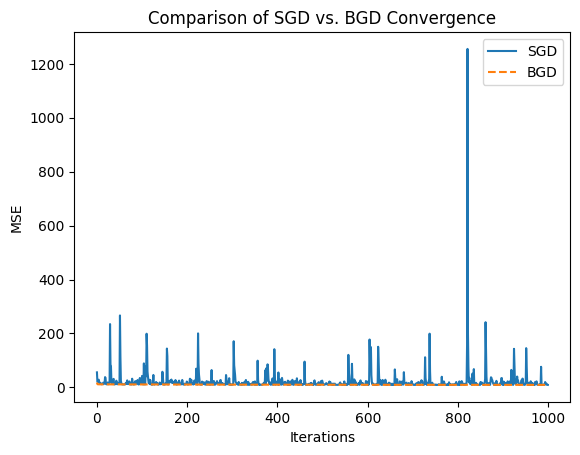

Test MSE (SGD): 8.9139
Test MSE (BGD): 9.6819


In [259]:
# Compare SGD vs BGD
plt.plot(mse_list, label="SGD")
plt.plot(mse_bgd, label="BGD", linestyle="dashed")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend()
plt.title("Comparison of SGD vs. BGD Convergence")
plt.show()

# Final comparison of accuracy
mse_sgd_test = np.mean((w0 + w1 * x_test - y_test) ** 2)
mse_bgd_test = np.mean((theta_bgd[0] + theta_bgd[1] * x_test - y_test) ** 2)

print(f"Test MSE (SGD): {mse_sgd_test:.4f}")
print(f"Test MSE (BGD): {mse_bgd_test:.4f}")

### Discussion BGD vs SGD

BGD is more stable, while SGD can be faster depending on the learning rate.
SGD generally converges faster but can be more unstable due to its stochastic nature. BGD is more stable but may take more iterations to converge.

## Question 2

In this part, you will face a real-world dataset, and use Logistic Regression to make the classification.

Step 1: Download and read the data. Split the dataset and apply Logistic Regression to classify different categories.

In [260]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score

In [261]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data as dataframes
x = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# Print metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# Print variable info
print(breast_cancer_wisconsin_diagnostic.variables) 

print(f"Original dataset shapes: x = {x.shape}, y = {y.shape}")



{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [262]:
# Split dataset (80 training, 20 testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize features to improve convergence (included due to iteration error)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression without penalty
log_reg = LogisticRegression(max_iter=5000, solver='saga')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
accuracy_no_penalty = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy (No Penalty): {accuracy_no_penalty:.4f}")


Logistic Regression Accuracy (No Penalty): 0.9737


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [263]:
# Logistic Regression with L1 and L2 penalties
log_reg_cv = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', max_iter=1000, scoring='accuracy')
log_reg_cv.fit(x_train, y_train)
y_pred_l1 = log_reg_cv.predict(x_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f"Logistic Regression Accuracy (L1 Penalty): {accuracy_l1:.4f}")

log_reg_cv = LogisticRegressionCV(cv=5, penalty='l2', solver='liblinear', max_iter=1000, scoring='accuracy')
log_reg_cv.fit(x_train, y_train)
y_pred_l2 = log_reg_cv.predict(x_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f"Logistic Regression Accuracy (L2 Penalty): {accuracy_l2:.4f}")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy (L1 Penalty): 0.9737


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy (L2 Penalty): 0.9825


In [264]:

# Compare models
print("Comparison of models:")
print(f"No Penalty Accuracy: {accuracy_no_penalty:.4f}")
print(f"L1 Penalty Accuracy: {accuracy_l1:.4f}")
print(f"L2 Penalty Accuracy: {accuracy_l2:.4f}")


Comparison of models:
No Penalty Accuracy: 0.9737
L1 Penalty Accuracy: 0.9737
L2 Penalty Accuracy: 0.9825


## Discussion
L1 penalty can be useful for feature selection, as it tends to shrink some coefficients to zero.
L2 penalty helps in preventing overfitting by reducing the magnitude of coefficients.
"Standardizing the dataset improves convergence and allows the optimizer to work efficiently.